<center> <h1> Machine Learning (Week 4&5) </h1> </center>
<center> <h2> Day 9&10 - Group ML Challenge</h2> </center>

_____

## Telecom Churn Prediction

Any business wants to maximize the number of customers. To achieve this goal, it is important not only to try to attract new ones, but also to retain existing ones. Retaining a client will cost the company less than attracting a new one. In addition, a new client may be weakly interested in business services and it will be difficult to work with him, while old clients already have the necessary data on interaction with the service.

Accordingly, predicting the churn, we can react in time and try to keep the client who wants to leave. Based on the data about the services that the client uses, we can make him a special offer, trying to change his decision to leave the operator. This will make the task of retention easier to implement than the task of attracting new users, about which we do not know anything yet.

You are provided with a dataset from a telecommunications company. The data contains information about almost six thousand users, their demographic characteristics, the services they use, the duration of using the operator's services, the method of payment, and the amount of payment.

The task is to analyze the data and predict the churn of users (to identify people who will and will not renew their contract). The work should include the following mandatory items:

1. Description of the data (with the calculation of basic statistics);
2. Research of dependencies and formulation of hypotheses;
3. Building models for predicting the outflow (with justification for the choice of a particular model) based on tested hypotheses and identified relationships;
4. Comparison of the quality of the obtained models.

**The features:**

- customerID - customer id
- gender - client gender (male / female)
- SeniorCitizen - is the client retired (1, 0)
- Partner - is the client married (Yes, No)
- tenure - how many months a person has been a client of the company
- PhoneService - is the telephone service connected (Yes, No)
- MultipleLines - are multiple phone lines connected (Yes, No, No phone service)
- InternetService - client’s Internet service provider (DSL, Fiber optic, No)
- OnlineSecurity - is the online security service connected (Yes, No, No internet service)
- OnlineBackup - is the online backup service activated (Yes, No, No internet service)
- DeviceProtection - does the client have equipment insurance (Yes, No, No internet service)
- TechSupport - is the technical support service connected (Yes, No, No internet service)
- StreamingTV - is the streaming TV service connected (Yes, No, No internet service)
- StreamingMovies - is the streaming cinema service activated (Yes, No, No internet service)
- Contract - type of customer contract (Month-to-month, One year, Two year)
- PaperlessBilling - whether the client uses paperless billing (Yes, No)
- PaymentMethod - payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges - current monthly payment
- TotalCharges - the total amount that the client paid for the services for the entire time
- Churn - whether there was a churn (Yes or No)

## Loading Dependencies

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import math
import shap

from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    f1_score,
    accuracy_score,
)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support, mutual_info_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import (
    SVC,
)  # SVM with Radial Basis Function for classification approach
from sklearn.svm import (
    LinearSVC,
)  # SVM Linear Kernel Support Vector for classification approach
from xgboost import XGBClassifier  # XGBoost for classification approach
from catboost import CatBoostClassifier  # CatBoost for classification approach
from sklearn.ensemble import (
    RandomForestClassifier,
)  #  RandomForest for classification approach
from sklearn.ensemble import AdaBoostClassifier  # AsaBoost for classification approach

from sklearn.cluster import KMeans

import warnings

warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 
%load_ext lab_black

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


## Necessary Functions for this Notebook

In [2]:
# FUNCTION --> # Shows you a report with the main info of each column from data frame
def df_main_insights(data_frame):
    print("\nThis data frame have the following shape: ", data_frame.shape)
    for col_name in data_frame.columns:
        print(
            "\nThe column:",
            '"',
            col_name,
            '"',
            "corresponds to index:",
            '"',
            data_frame.columns.get_loc(col_name),
            '"',
            "contains this amount of unique values inside:",
            '"',
            len(data_frame[col_name].unique()),
            '"',
            "contain this type of data:",
            data_frame[col_name].dtypes,
            '"',
        )

In [3]:
# FUNCTION --> # Identifies all unique values for all df columns
def df_identification_of_unique_values_per_column(data_frame):
    # variable to hold the count
    cnt = 0
    # list to hold visited values
    visited = []
    for col_name in data_frame.columns:
        # Listing all unique values that exist in the specified colum of the data frame
        print(
            "\nColumn name:",
            col_name,
            "have these unique data elements:\n\n",
            '"',
            data_frame[col_name].unique(),
            '"',
        )

In [4]:
# FUNCTION --> # Shows you (if applies) in which colums you already have NaN and/or Null values
def df_check_of_NaNs_and_Nulls(data_frame):
    print(
        "\nYour dataframe NaN content is:\t\n\n", data_frame.isna().values.any(), "\n"
    )
    print(
        "\nYour dataframe Null content is:\t\n\n",
        data_frame.isnull().values.any(),
        "\n",
    )

In [5]:
# FUNCTION --> Model Evaluation Function based on SCORES
model_accuracy = {}  # Empty dictionary for holding the model accuracy


def model_evaluation(model_name, predictions):

    # Evaluation Summary:
    print("Classification Report:\n", classification_report(y_test, predictions))
    print("----------------------------------------------------------")
    print(
        "Standard Confussion Matrix (error matrix):\n",
        confusion_matrix(y_test, predictions),
    )
    # Uncomment here those Metrics you want to use (leave as comment those not needed)
    f1_macro = f1_score(y_test, predictions, average="macro")
    f1_micro = f1_score(y_test, predictions, average="micro")
    f1_weighted = f1_score(y_test, predictions, average="weighted")
    f1 = np.min(f1_score(y_test, predictions, average=None))
    # recall = accuracy_score(y_test, predictions)
    # precision = accuracy_score(y_test, predictions)
    accuracy = accuracy_score(y_test, predictions)

    print("Accuracy Score obtained is: %.2f%%" % (accuracy * 100.0))
    print("----------------------------------------------------------")
    print("f1_macro Score obtained is: %.2f%%" % (f1_macro * 100.0))
    print("----------------------------------------------------------")
    print("f1_micro Score obtained is: %.2f%%" % (f1_micro * 100.0))
    print("----------------------------------------------------------")
    print("f1_weighted Score obtained is: %.2f%%" % (f1_weighted * 100.0))
    print("----------------------------------------------------------")
    print("f1 Score obtained is: %.2f%%" % (f1 * 100.0))

    model_accuracy[f"{model_name}"] = accuracy

In [6]:
# DESCRIPTION --> # it plots the distributions of your data
def plot_count(df, ncols, nrows, figsize):
    vars_ = df.select_dtypes(include=["object", "category"]).columns.tolist()
    vars_.remove("Churn")
    c = 0
    plt.figure(figsize=figsize)
    for v in vars_:
        ax = plt.subplot(nrows, ncols, c + 1)
        sns.countplot(df[v], hue="Churn", data=df, palette="Set2", alpha=0.8)
        plt.xlabel(v, fontsize=16)
        plt.legend(loc="best", fontsize=10)
        plt.xticks(rotation=45)
        c = c + 1
    plt.show()

In [7]:
def percentage_stacked_plot(columns_to_plot, super_title, df_telco):

    """
    Prints a 100% stacked plot of the response variable for independent variable of the list columns_to_plot.
            Parameters:
                    columns_to_plot (list of string): Names of the variables to plot
                    super_title (string): Super title of the visualization
                    df: Dataset
            Returns:
                    None
    """

    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot) / 2)

    # create a figure
    fig = plt.figure(figsize=(12, 5 * number_of_rows))
    fig.suptitle(super_title, fontsize=22, y=0.95)

    # loop to each column name to create a subplot
    for index, column in enumerate(columns_to_plot, 1):

        # create the subplot
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)

        # calculate the percentage of observations of the response variable for each group of the independent variable
        # 100% stacked bar plot
        prop_by_independent = pd.crosstab(df_telco[column], df_telco["Churn"]).apply(
            lambda x: x / x.sum() * 100, axis=1
        )

        prop_by_independent.plot(
            kind="bar", ax=ax, stacked=True, rot=0, colormap="Paired", alpha=0.8
        )

        # set the legend in the upper right corner
        ax.legend(
            loc="upper right",
            bbox_to_anchor=(0.62, 0.5, 0.5, 0.5),
            title="Churn",
            fancybox=True,
        )

        # set title and labels
        ax.set_title("Proportion of observations by " + column, fontsize=16, loc="left")

        ax.tick_params(rotation="auto")

        # eliminate the frame from the plot
        spine_names = ("top", "right", "bottom", "left")
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)

In [8]:
def histogram_plots(columns_to_plot, super_title, df_telco):
    """
    Prints a histogram for each independent variable of the list columns_to_plot.
           Parameters:
                   columns_to_plot (list of string): Names of the variables to plot
                   super_title (string): Super title of the visualization
           Returns:
                   None
    """

    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot) / 2)

    # create a figure
    fig = plt.figure(figsize=(12, 5 * number_of_rows))
    fig.suptitle(super_title, fontsize=22, y=0.95)

    # loop to each demographic column name to create a subplot
    for index, column in enumerate(columns_to_plot, 1):

        # create the subplot
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)

        # histograms for each class (normalized histogram)
        df_telco[df_telco["Churn"] == "No"][column].plot(
            kind="hist", ax=ax, density=True, alpha=0.5, color="brown", label="No"
        )
        df_telco[df_telco["Churn"] == "Yes"][column].plot(
            kind="hist", ax=ax, density=True, alpha=0.5, color="blue", label="Yes"
        )

        # set the legend in the upper right corner
        ax.legend(
            loc="upper right",
            bbox_to_anchor=(0.5, 0.5, 0.5, 0.5),
            title="Churn",
            fancybox=True,
        )

        # set title and labels
        ax.set_title("Distribution of " + column + " by churn", fontsize=16, loc="left")

        ax.tick_params(rotation="auto")

        # eliminate the frame from the plot
        spine_names = ("top", "right", "bottom", "left")
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)

## Data Loading

In [9]:
df = pd.read_csv("../../data/telecom_users.csv", index_col=0)
print(f"telecom_users.csv : {df.shape}")
df.head(5)

telecom_users.csv : (5986, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [10]:
# from google.colab import files

# uploaded = files.upload()

In [11]:
# import io

# df = pd.read_csv(io.BytesIO(uploaded['telecom_users.csv']))
# print(df)

## Data Cleaning

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5986 entries, 1869 to 860
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5986 non-null   object 
 1   gender            5986 non-null   object 
 2   SeniorCitizen     5986 non-null   int64  
 3   Partner           5986 non-null   object 
 4   Dependents        5986 non-null   object 
 5   tenure            5986 non-null   int64  
 6   PhoneService      5986 non-null   object 
 7   MultipleLines     5986 non-null   object 
 8   InternetService   5986 non-null   object 
 9   OnlineSecurity    5986 non-null   object 
 10  OnlineBackup      5986 non-null   object 
 11  DeviceProtection  5986 non-null   object 
 12  TechSupport       5986 non-null   object 
 13  StreamingTV       5986 non-null   object 
 14  StreamingMovies   5986 non-null   object 
 15  Contract          5986 non-null   object 
 16  PaperlessBilling  5986 non-null   object

In [13]:
df_identification_of_unique_values_per_column(df)


Column name: customerID have these unique data elements:

 " ['7010-BRBUU' '9688-YGXVR' '9286-DOJGF' ... '8044-BGWPI' '7450-NWRTR'
 '4795-UXVCJ'] "

Column name: gender have these unique data elements:

 " ['Male' 'Female'] "

Column name: SeniorCitizen have these unique data elements:

 " [0 1] "

Column name: Partner have these unique data elements:

 " ['Yes' 'No'] "

Column name: Dependents have these unique data elements:

 " ['Yes' 'No'] "

Column name: tenure have these unique data elements:

 " [72 44 38  4  2 70 33  1 39 55 52 30 60 50 32 51 69 42 14 62  5 63 67 40
 65 16 46 11 49 68 10 53 54 15  3 71  8 64 57 20 26 31  7 35  6 13 23  9
 45 17 34 58 12 25 28 29 43 19 41 37 27 22 24 18 56 66 59 48 47 61 21  0
 36] "

Column name: PhoneService have these unique data elements:

 " ['Yes' 'No'] "

Column name: MultipleLines have these unique data elements:

 " ['Yes' 'No' 'No phone service'] "

Column name: InternetService have these unique data elements:

 " ['No' 'Fiber optic' 

In [14]:
n_unique_df = df.nunique(axis=0)
print("No.of.unique values in each column :\n", n_unique_df)

No.of.unique values in each column :
 customerID          5986
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1526
TotalCharges        5611
Churn                  2
dtype: int64


In [15]:
# Checking whether NaN's and/or Null values exist
df = df.replace(" ", np.nan)
df_check_of_NaNs_and_Nulls(df)


Your dataframe NaN content is:	

 True 


Your dataframe Null content is:	

 True 



In [16]:
df.dropna(inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5976 entries, 1869 to 860
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5976 non-null   object 
 1   gender            5976 non-null   object 
 2   SeniorCitizen     5976 non-null   int64  
 3   Partner           5976 non-null   object 
 4   Dependents        5976 non-null   object 
 5   tenure            5976 non-null   int64  
 6   PhoneService      5976 non-null   object 
 7   MultipleLines     5976 non-null   object 
 8   InternetService   5976 non-null   object 
 9   OnlineSecurity    5976 non-null   object 
 10  OnlineBackup      5976 non-null   object 
 11  DeviceProtection  5976 non-null   object 
 12  TechSupport       5976 non-null   object 
 13  StreamingTV       5976 non-null   object 
 14  StreamingMovies   5976 non-null   object 
 15  Contract          5976 non-null   object 
 16  PaperlessBilling  5976 non-null   object

In [18]:
df = df.astype({"TotalCharges": float, "SeniorCitizen": object})
df["Churn"].replace({"No": 0, "Yes": 1}, inplace=True)

In [19]:
df["Churn"].value_counts()

0    4389
1    1587
Name: Churn, dtype: int64

In [20]:
df["Internet_connection"] = df["InternetService"].apply(
    lambda x: "No" if x == "No" else "Yes"
)

In [21]:
df = df.replace(
    ["Bank transfer (automatic)", "Credit card (automatic)"],
    ["Bank transfer", "Credit card"],
)

In [22]:
# Dropping useless columns:
df_model = df.drop(
    columns=[
        "customerID",
        "InternetService",
    ]
)

In [23]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5976 entries, 1869 to 860
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               5976 non-null   object 
 1   SeniorCitizen        5976 non-null   int64  
 2   Partner              5976 non-null   object 
 3   Dependents           5976 non-null   object 
 4   tenure               5976 non-null   int64  
 5   PhoneService         5976 non-null   object 
 6   MultipleLines        5976 non-null   object 
 7   OnlineSecurity       5976 non-null   object 
 8   OnlineBackup         5976 non-null   object 
 9   DeviceProtection     5976 non-null   object 
 10  TechSupport          5976 non-null   object 
 11  StreamingTV          5976 non-null   object 
 12  StreamingMovies      5976 non-null   object 
 13  Contract             5976 non-null   object 
 14  PaperlessBilling     5976 non-null   object 
 15  PaymentMethod        5976 non-null  

## Data Exploration

### Analysing the target column - churn status

In [24]:
# The composition of churn
df_churn = pd.DataFrame(df["Churn"].value_counts()).reset_index()
df_churn["Percentage"] = df_churn["Churn"] / df["Churn"].value_counts().sum()
df_churn.rename(columns={"index": "Churn", "Churn": "Total"}, inplace=True)
df_churn = df_churn.sort_values("Total", ascending=True).reset_index(drop=True)
# Show the data
df_churn

,Churn,Total,Percentage
0,1,1587,0.265562
1,0,4389,0.734438


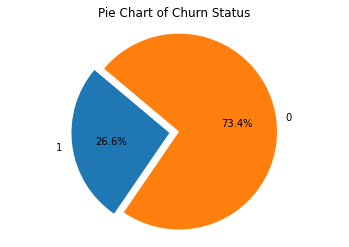

In [25]:
# Customize colors and other settings
explode = (0.1, 0)  # Explode 1st slice
# Create a pie chart
plt.pie(
    df_churn["Total"],
    explode=explode,
    labels=df_churn["Churn"],
    colors=None,
    autopct="%1.1f%%",
    shadow=False,
    startangle=140,
)
# Add title
plt.title("Pie Chart of Churn Status")
plt.axis("equal")
plt.show()

In the marketing, cost spend by the company to acquire the new customer is greater than the retain existing customers. So that the results of the clustering analysis are expected to help the company find strategies for preventing the churned customers.

### Demographic Information

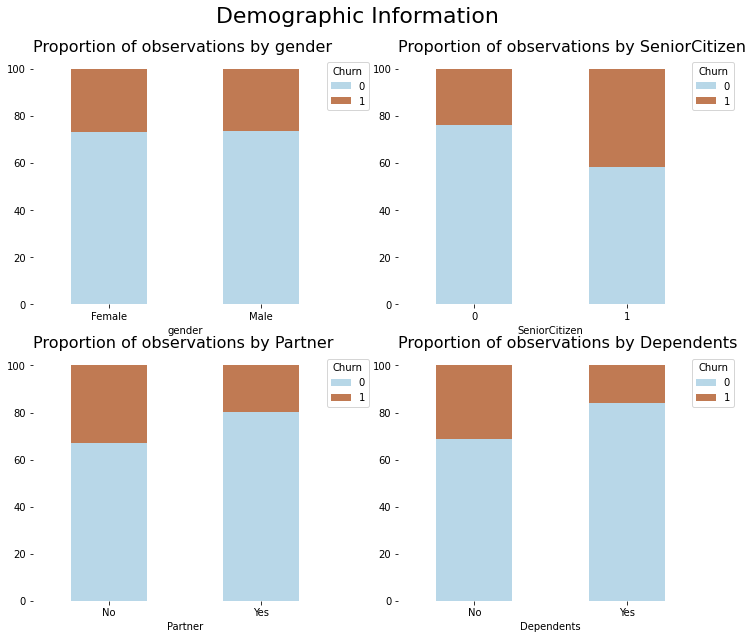

In [26]:
# demographic column names
demographic_columns = ["gender", "SeniorCitizen", "Partner", "Dependents"]

# stacked plot of demographic columns
percentage_stacked_plot(demographic_columns, "Demographic Information", df_model)

We can extract the following conclusions by analyzing demographic attributes:
The churn rate of senior citizens is almost double that of young citizens.
We do not expect gender to have significant predictive power. A similar percentage of churn is shown both when a customer is a man or a woman.
Customers with a partner churn less than customers with no partner.

### Customer Account Information — Categorical variables

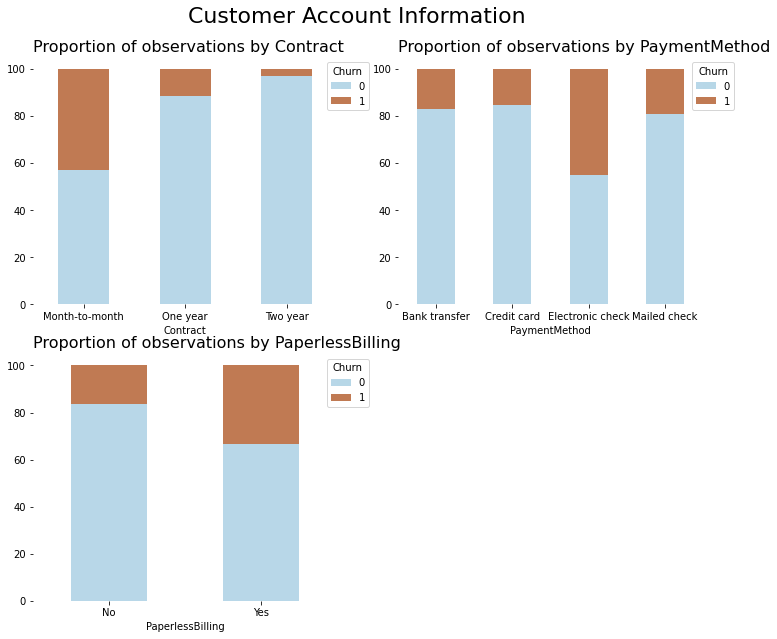

In [27]:
# customer account column names
account_columns = [
    "Contract",
    "PaymentMethod",
    "PaperlessBilling",
]

# stacked plot of customer account columns
percentage_stacked_plot(account_columns, "Customer Account Information", df)

We can extract the following conclusions by analyzing customer account attributes:
Customers with month-to-month contracts have higher churn rates compared to clients with yearly contracts.
Customers who opted for an electronic check as paying method are more likely to leave the company.
Customers subscribed to paperless billing churn more than those who are not subscribed.

## Customer Account Information — Numerical variables

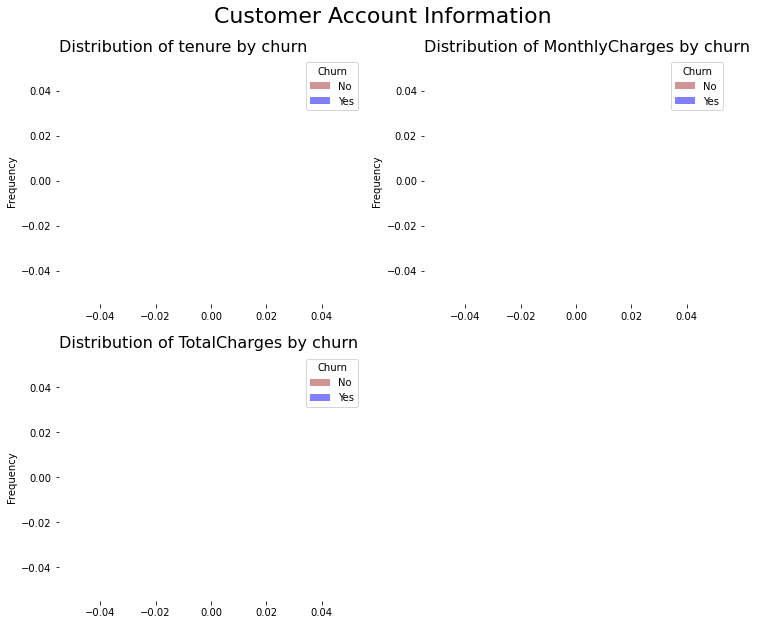

In [28]:
# customer account column names
account_columns_numeric = ["tenure", "MonthlyCharges", "TotalCharges"]
# histogram of costumer account columns
histogram_plots(account_columns_numeric, "Customer Account Information", df)

We can extract the following conclusions by analyzing the histograms above:
The churn rate tends to be larger when monthly charges are high.
New customers (low tenure) are more likely to churn.
Clients with high total charges are less likely to leave the company.

## Services Information

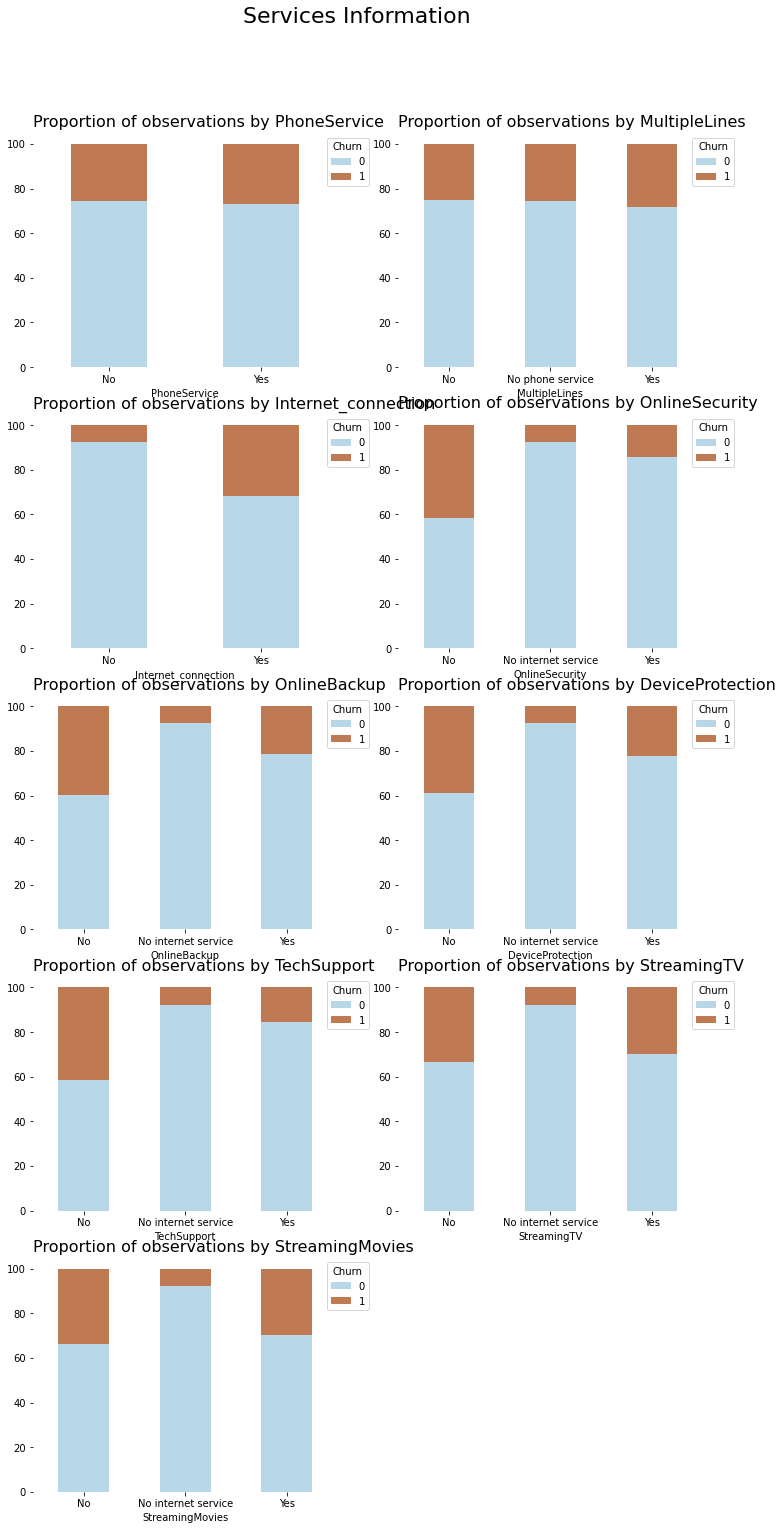

In [29]:
# services column names
services_columns = [
    "PhoneService",
    "MultipleLines",
    "Internet_connection",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
]

# stacked plot of services columns
percentage_stacked_plot(services_columns, "Services Information", df_model)

We can extract the following conclusions by evaluating services attributes:
We do not expect phone attributes (PhoneService and MultipleLines) to have significant predictive power. The percentage of churn for all classes in both independent variables is nearly the same.
Clients with online security churn less than those without it.
Customers with no tech support tend to churn more often than those with tech support.

### Heatmap - correlation numerical values

<AxesSubplot:>

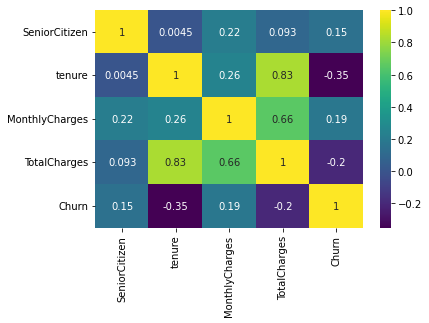

In [30]:
sns.heatmap(df.corr(), annot=True, cmap="viridis")

### Mutual information — analysis of linear and nonlinear relationships

In [31]:
# function that computes the mutual infomation score between a categorical serie and the column Churn
def compute_mutual_information(categorical_serie):
    return mutual_info_score(categorical_serie, df_model.Churn)


# select categorial variables excluding the response variable
categorical_variables = df_model.select_dtypes(include=object)

# compute the mutual information score between each categorical variable and the target
feature_importance = categorical_variables.apply(
    compute_mutual_information
).sort_values(ascending=False)

# visualize feature importance
print(feature_importance)

Contract               0.097633
OnlineSecurity         0.063692
TechSupport            0.060449
OnlineBackup           0.045347
PaymentMethod          0.042964
DeviceProtection       0.042869
StreamingMovies        0.030697
StreamingTV            0.030580
Internet_connection    0.030011
PaperlessBilling       0.018530
Dependents             0.013533
Partner                0.010833
MultipleLines          0.000651
gender                 0.000044
PhoneService           0.000042
dtype: float64


## Setting a baseline

The rate of customers that did not churn (most frequent class) can be used as a baseline to evaluate the quality of the models generated. These models should outperform the baseline capabilities to be considered for future predictions.

## Train and Test Split

In [32]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5976 entries, 1869 to 860
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               5976 non-null   object 
 1   SeniorCitizen        5976 non-null   int64  
 2   Partner              5976 non-null   object 
 3   Dependents           5976 non-null   object 
 4   tenure               5976 non-null   int64  
 5   PhoneService         5976 non-null   object 
 6   MultipleLines        5976 non-null   object 
 7   OnlineSecurity       5976 non-null   object 
 8   OnlineBackup         5976 non-null   object 
 9   DeviceProtection     5976 non-null   object 
 10  TechSupport          5976 non-null   object 
 11  StreamingTV          5976 non-null   object 
 12  StreamingMovies      5976 non-null   object 
 13  Contract             5976 non-null   object 
 14  PaperlessBilling     5976 non-null   object 
 15  PaymentMethod        5976 non-null  

In [33]:
X = df_model.drop(columns=["Churn", "TotalCharges"])
y = df_model["Churn"]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
X_train.shape, X_test.shape

((4183, 18), (1793, 18))

In [35]:
categorical_features = X_train.select_dtypes(
    include=["object", "category"]
).columns.tolist()
numeric_features = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features, numeric_features

(['gender',
  'Partner',
  'Dependents',
  'PhoneService',
  'MultipleLines',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod',
  'Internet_connection'],
 ['SeniorCitizen', 'tenure', 'MonthlyCharges'])

#### Define Categorical Transformer Pipeline

In [36]:
categorical_transformer = Pipeline(
    steps=[("onehot", OneHotEncoder(handle_unknown="ignore"))]
)
categorical_transformer

Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

#### Numeric Transformer Pipeline

In [37]:
numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])
numeric_transformer

Pipeline(steps=[('scaler', StandardScaler())])

#### Define Column Transformer Pipeline for preprocessing

In [38]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

## Model Building

### Pycaret

In [39]:
from pycaret.classification import *

reg = setup(
    data=pd.concat([X_train, y_train], axis=1),
    target="Churn",
    session_id=13,
    fold_shuffle=True,
    imputation_type="iterative",
    log_experiment=True,
    experiment_name="Challenge",
)

,Description,Value
0,session_id,13
1,Target,Churn
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(4183, 19)"
5,Missing Values,False
6,Numeric Features,2
7,Categorical Features,16
8,Ordinal Features,False
9,High Cardinality Features,False


In [40]:
xgb = XGBClassifier(random_state=42)
xgbm = create_model(xgb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7304,0.7604,0.4177,0.5000,0.4552,0.2779,0.2799
1,0.7816,0.8225,0.5316,0.6087,0.5676,0.4223,0.4241
2,0.7747,0.7813,0.4557,0.6102,0.5217,0.3784,0.3853
3,0.7577,0.8208,0.4684,0.5606,0.5103,0.3511,0.3536
4,0.7577,0.8104,0.5570,0.5500,0.5535,0.3872,0.3872
5,0.7816,0.8191,0.5000,0.6094,0.5493,0.4070,0.4105
6,0.7440,0.7665,0.4744,0.5211,0.4966,0.3255,0.3262
7,0.7747,0.8115,0.5769,0.5769,0.5769,0.4234,0.4234
8,0.8253,0.8401,0.5385,0.7368,0.6222,0.5122,0.5228
9,0.8185,0.8380,0.6026,0.6812,0.6395,0.5188,0.5205


In [41]:
CatB = CatBoostClassifier()
catbm = create_model(CatB)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7747,0.8010,0.5316,0.5915,0.5600,0.4092,0.4103
1,0.8055,0.8703,0.5316,0.6774,0.5957,0.4701,0.4761
2,0.7986,0.8207,0.5190,0.6613,0.5816,0.4515,0.4572
3,0.7747,0.8298,0.4684,0.6066,0.5286,0.3838,0.3893
4,0.7713,0.8256,0.4810,0.5938,0.5315,0.3824,0.3861
5,0.7747,0.8275,0.4103,0.6154,0.4923,0.3549,0.3670
6,0.7645,0.7771,0.4359,0.5763,0.4964,0.3465,0.3523
7,0.7713,0.8144,0.5128,0.5797,0.5442,0.3924,0.3937
8,0.8151,0.8691,0.5513,0.6935,0.6143,0.4947,0.5004
9,0.8082,0.8547,0.5128,0.6897,0.5882,0.4667,0.4754


In [42]:
models = ["lr", "knn", "dt", "rf", xgbm, "ada", catbm, "svm", "rbfsvm", "nb"]

In [43]:
best_model = compare_models(include=models, fold=10, n_select=2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Logistic Regression,0.7951,0.8366,0.5248,0.6468,0.5789,0.4454,0.4501,0.1480
5,Ada Boost Classifier,0.7920,0.8379,0.5273,0.6363,0.5761,0.4400,0.4437,0.0830
6,CatBoost Classifier,0.7859,0.8290,0.4955,0.6285,0.5533,0.4152,0.4208,1.5310
8,SVM - Radial Kernel,0.7859,0.7613,0.4216,0.6585,0.5133,0.3845,0.4006,0.6150
3,Random Forest Classifier,0.7777,0.8097,0.4598,0.6155,0.5260,0.3847,0.3920,0.2580
4,Extreme Gradient Boosting,0.7746,0.8071,0.5123,0.5955,0.5493,0.4004,0.4034,0.2170
1,K Neighbors Classifier,0.7575,0.7631,0.5033,0.5543,0.5265,0.3643,0.3658,0.0660
7,SVM - Linear Kernel,0.7429,0.0000,0.4606,0.6684,0.4234,0.2947,0.3490,0.0320
9,Naive Bayes,0.7350,0.8202,0.7553,0.5051,0.6049,0.4175,0.4369,0.0260
2,Decision Tree Classifier,0.7254,0.6570,0.5021,0.4894,0.4949,0.3067,0.3072,0.0130


In [44]:
best_model

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=13, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                    n_estimators=50, random_state=13)]

### Logistic Regression 

In [45]:
tuned_lr = tune_model(best_model[0])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7747,0.8197,0.4937,0.6000,0.5417,0.3942,0.3975
1,0.8123,0.8780,0.5570,0.6875,0.6154,0.4930,0.4978
2,0.7986,0.8179,0.4937,0.6724,0.5693,0.4419,0.4509
3,0.7952,0.8427,0.5190,0.6508,0.5775,0.4446,0.4495
4,0.8123,0.8519,0.5823,0.6765,0.6259,0.5015,0.5040
5,0.7918,0.8138,0.4872,0.6441,0.5547,0.4223,0.4293
6,0.7850,0.7999,0.4872,0.6230,0.5468,0.4086,0.4139
7,0.7747,0.8144,0.5256,0.5857,0.5541,0.4040,0.4050
8,0.7945,0.8535,0.4487,0.6731,0.5385,0.4130,0.4271
9,0.8356,0.8751,0.5513,0.7679,0.6418,0.5388,0.5513


In [142]:
pipeline_lr = Pipeline(steps=[("pre_process", preprocessor), ("model", tuned_lr)])

In [143]:
pipeline_lr.fit(X_train, y_train)
y_pred_lr = pipeline_lr.predict(X_test)

In [144]:
model_evaluation(pipeline_lr, y_pred_lr)

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1317
           1       0.66      0.51      0.57       476

    accuracy                           0.80      1793
   macro avg       0.75      0.71      0.72      1793
weighted avg       0.79      0.80      0.79      1793

----------------------------------------------------------
Standard Confussion Matrix (error matrix):
 [[1190  127]
 [ 233  243]]
Accuracy Score obtained is: 79.92%
----------------------------------------------------------
f1_macro Score obtained is: 72.15%
----------------------------------------------------------
f1_micro Score obtained is: 79.92%
----------------------------------------------------------
f1_weighted Score obtained is: 79.05%
----------------------------------------------------------
f1 Score obtained is: 57.45%


### Ada Boost Classifier

In [49]:
tuned_adab = tune_model(best_model[1])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7918,0.8418,0.5443,0.6324,0.5850,0.4471,0.4494
1,0.8294,0.8800,0.5696,0.7377,0.6429,0.5332,0.5409
2,0.7713,0.8258,0.4684,0.5968,0.5248,0.3771,0.3819
3,0.7918,0.8506,0.5316,0.6364,0.5793,0.4425,0.4456
4,0.7884,0.8599,0.5316,0.6269,0.5753,0.4357,0.4383
5,0.7884,0.8225,0.5000,0.6290,0.5571,0.4205,0.4253
6,0.7713,0.7891,0.4872,0.5846,0.5315,0.3819,0.3847
7,0.7850,0.8172,0.5128,0.6154,0.5594,0.4188,0.4218
8,0.8185,0.8698,0.5641,0.6984,0.6241,0.5063,0.5113
9,0.8116,0.8603,0.5385,0.6885,0.6043,0.4831,0.4894


In [50]:
pipeline_ada = Pipeline([("pre_process", preprocessor), ("model", tuned_adab)])

In [51]:
pipeline_ada.fit(X_train, y_train)
y_pred_ada = pipeline_ada.predict(X_test)

In [52]:
model_evaluation(pipeline_ada, y_pred_ada)

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1317
           1       0.66      0.53      0.59       476

    accuracy                           0.80      1793
   macro avg       0.75      0.72      0.73      1793
weighted avg       0.79      0.80      0.80      1793

----------------------------------------------------------
Standard Confussion Matrix (error matrix):
 [[1187  130]
 [ 222  254]]
Accuracy Score obtained is: 80.37%
----------------------------------------------------------
f1_macro Score obtained is: 73.08%
----------------------------------------------------------
f1_micro Score obtained is: 80.37%
----------------------------------------------------------
f1_weighted Score obtained is: 79.65%
----------------------------------------------------------
f1 Score obtained is: 59.07%


## Model Comparisson

### Feature Importance

In [53]:
pipeline_lr["pre_process"].transformers_

[('num',
  Pipeline(memory=None,
           steps=[('scaler',
                   StandardScaler(copy=True, with_mean=True, with_std=True))],
           verbose=False),
  ['SeniorCitizen', 'tenure', 'MonthlyCharges']),
 ('cat',
  Pipeline(memory=None,
           steps=[('onehot',
                   OneHotEncoder(categories='auto', drop=None,
                                 dtype=<class 'numpy.float64'>,
                                 handle_unknown='ignore', sparse=True))],
           verbose=False),
  ['gender',
   'Partner',
   'Dependents',
   'PhoneService',
   'MultipleLines',
   'OnlineSecurity',
   'OnlineBackup',
   'DeviceProtection',
   'TechSupport',
   'StreamingTV',
   'StreamingMovies',
   'Contract',
   'PaperlessBilling',
   'PaymentMethod',
   'Internet_connection'])]

In [54]:
num_features = list(pipeline_lr["pre_process"].transformers_[0][2])

cat_features = list(
    pipeline_lr["pre_process"]
    .transformers_[1][1]["onehot"]
    .get_feature_names(categorical_features)
)
feature_cols = num_features + cat_features

In [55]:
lr_importances = pd.DataFrame(
    {
        "feature": feature_cols,
        "importance": np.round(pipeline_lr["model"].coef_, 3).reshape(-1),
    }
)
lr_importances = lr_importances.sort_values("importance", ascending=False).set_index(
    "feature"
)
lr_importances

,importance
feature,
MonthlyCharges,0.789
Contract_Month-to-month,0.616
PaymentMethod_Electronic check,0.292
OnlineSecurity_No,0.251
MultipleLines_No phone service,0.208
PhoneService_No,0.208
TechSupport_No,0.205
PaperlessBilling_Yes,0.178
OnlineBackup_No,0.146


In [56]:
final = lr_importances.iloc[np.r_[0:3, -3:0]]

<AxesSubplot:ylabel='feature'>

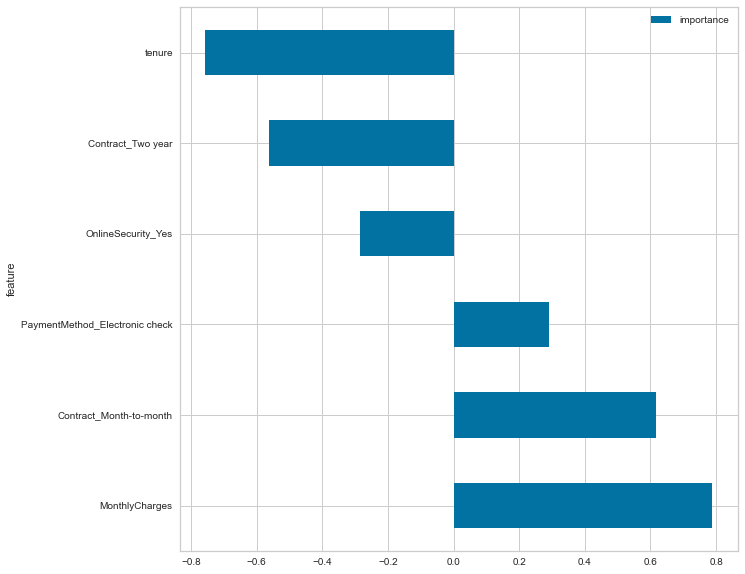

In [57]:
f, ax = plt.subplots(figsize=(10, 10))
final.head(10).plot(kind="barh", ax=ax)

In [58]:
num_features = list(pipeline_ada["pre_process"].transformers_[0][2])

cat_features = list(
    pipeline_ada["pre_process"]
    .transformers_[1][1]["onehot"]
    .get_feature_names(categorical_features)
)
feature_cols = num_features + cat_features

In [59]:
l = len(np.round(pipeline_ada["model"].feature_importances_, 3).reshape(-1))

In [60]:
ada_importances = pd.DataFrame(
    {
        "feature": feature_cols[:l],
        "importance": np.round(pipeline_ada["model"].feature_importances_, 3).reshape(
            -1
        ),
    }
)
ada_importances = ada_importances.sort_values("importance", ascending=False).set_index(
    "feature"
)
ada_importances.head(20)

,importance
feature,
tenure,0.371
MonthlyCharges,0.300
StreamingMovies_Yes,0.043
MultipleLines_No,0.043
SeniorCitizen,0.029
PaymentMethod_Electronic check,0.029
OnlineBackup_No,0.029
PaperlessBilling_Yes,0.029
Contract_Month-to-month,0.029


 ### Adding Custom Metric

In [61]:
df_monthly = df_model.groupby(["Churn", "Contract"])
df_monthly.mean()

SeniorCitizen     tenure  MonthlyCharges  TotalCharges
Churn Contract                                                              
0     Month-to-month       0.166221  21.089792       61.630385   1530.920230
      One year             0.125111  41.351375       62.468500   2880.639663
      Two year             0.080518  57.037383       60.468512   3710.577678
1     Month-to-month       0.266094  14.057225       72.563054   1159.118455
      One year             0.189189  46.054054       85.864189   4188.954054
      Two year             0.048780  60.707317       86.551220   5379.298780

In a churn model, the reward of true positives is way different than the cost of false positives. We use the following assumptions:

$180 voucher will be offered to all the customers identified as churn (True Positive + False Positive) for 1 year;

If we are able to stop the churn, we will gain $720 in customer value for 1 year.

In [243]:
# create a custom function
def calculate_profit(y, y_pred):
    tp = np.where((y_pred == 1) & (y == 1), (720 - 180), 0)
    fp = np.where((y_pred == 1) & (y == 0), -180, 0)
    return np.sum([tp, fp])


# add metric to PyCaret
add_metric("profit2", "Profit", calculate_profit)

Name                                                            Profit
Display Name                                                    Profit
Score Function       <function calculate_profit at 0x000001D047C0BD90>
Scorer                                   make_scorer(calculate_profit)
Target                                                            pred
Args                                                                {}
Greater is Better                                                 True
Multiclass                                                        True
Custom                                                            True
Name: profit2, dtype: object

In [244]:
best_model = compare_models(include=models, fold=10, n_select=2, sort="Profit")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Profit,TT (Sec)
9,Naive Bayes,0.7350,0.8202,0.7553,0.5051,0.6049,0.4175,0.4369,21510.0000,0.0190
0,Logistic Regression,0.7951,0.8366,0.5248,0.6468,0.5789,0.4454,0.4501,18162.0000,0.8120
5,Ada Boost Classifier,0.7920,0.8379,0.5273,0.6363,0.5761,0.4400,0.4437,18072.0000,0.0960
6,CatBoost Classifier,0.7859,0.8290,0.4955,0.6285,0.5533,0.4152,0.4208,16848.0000,2.2030
4,Extreme Gradient Boosting,0.7746,0.8071,0.5123,0.5955,0.5493,0.4004,0.4034,16722.0000,0.2770
1,K Neighbors Classifier,0.7575,0.7631,0.5033,0.5543,0.5265,0.3643,0.3658,15570.0000,0.0780
3,Random Forest Classifier,0.7777,0.8097,0.4598,0.6155,0.5260,0.3847,0.3920,15408.0000,0.2580
8,SVM - Radial Kernel,0.7859,0.7613,0.4216,0.6585,0.5133,0.3845,0.4006,14760.0000,0.5760
2,Decision Tree Classifier,0.7254,0.6570,0.5021,0.4894,0.4949,0.3067,0.3072,13842.0000,0.0150
7,SVM - Linear Kernel,0.7429,0.0000,0.4606,0.6684,0.4234,0.2947,0.3490,13608.0000,0.0330


INFO:logs:create_model_container: 34
INFO:logs:master_model_container: 34
INFO:logs:display_container: 8
INFO:logs:[GaussianNB(priors=None, var_smoothing=1e-09), LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=13, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)]
INFO:logs:compare_models() succesfully completed......................................


### Shap Analysis

In [145]:
X["MonthlyCharges"] = X["MonthlyCharges"].astype(int)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
X_train_sample = X_train.sample(n=int(0.05 * X_train.shape[0]))
X_test_sample = X_test.sample(n=int(0.05 * X_test.shape[0]))
y_train_sample = y_train.sample(n=int(0.05 * y_train.shape[0]))
y_test_sample = y_test.sample(n=int(0.05 * y_test.shape[0]))

In [146]:
X_train_new = preprocessor.fit_transform(X_train_sample)
X_test_new = preprocessor.transform(X_test_sample)

In [148]:
num_features = list(pipeline_lr["pre_process"].transformers_[0][2])

cat_features = list(
    pipeline_lr["pre_process"]
    .transformers_[1][1]["onehot"]
    .get_feature_names(categorical_features)
)
feature_cols = num_features + cat_features

In [149]:
explainer = shap.KernelExplainer(
    pipeline_lr["model"].predict, data=X_train_new, index=True
)
shap_values = explainer.shap_values(X_test_new)

  0%|          | 0/89 [00:00<?, ?it/s]

In [151]:
shap_values[0]

array([ 0.12024465,  0.19359837, -0.32465505,  0.        ,  0.00445731,
        0.        ,  0.        ,  0.        ,  0.        ,  0.06571027,
        0.07617795,  0.02906547,  0.07654075,  0.01244954,  0.05251752,
        0.00547451,  0.04484019,  0.02981555,  0.00713922,  0.01279396,
        0.00262257,  0.        , -0.03780187,  0.04813436,  0.        ,
        0.04310121,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.07658893,  0.01465366,  0.02624819,
        0.02067435,  0.0169612 ,  0.00972916,  0.02186196,  0.11377468,
        0.00761632,  0.        ,  0.        ])

In [152]:
df_s = pd.DataFrame(shap_values, columns=feature_cols)

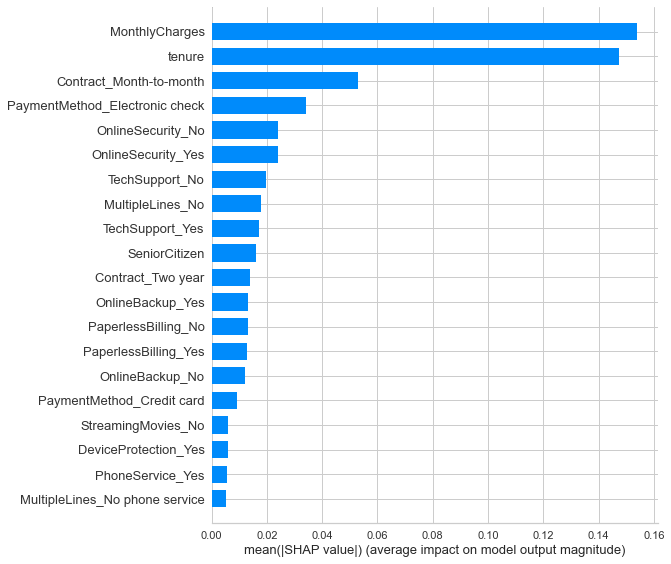

In [153]:
shap.summary_plot(shap_values, df_s, plot_type="bar")

In [173]:
y_pred_lr = pipeline_lr.predict(X_test_sample)
y_pred_lr_proba = pipeline_lr.predict_proba(X_test_sample)

In [155]:
explainer.expected_value

0.22966507177033493

In [178]:
y_test_sample.iloc[3], y_pred_lr[3], y_pred_lr_proba[3][1]

(0, 0, 0.18689856468754823)

In [170]:
X_test_news = pd.DataFrame(X_test_new, columns=feature_cols)

In [172]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[3], X_test_news.iloc[3, :])

### **Clustering:** K-Means

In [179]:
r_seed = 23  # random seed to use during modeling for reproducability purposes

In [223]:
X_clustering = preprocessor.fit_transform(X)
X_clustering = pd.DataFrame(X_clustering, columns=feature_cols)
X_clustering.shape

(5976, 43)

In [224]:
cluster_errors = []
for i in range(1, 15):
    n_clusters = i
    kmeans_pipeline = Pipeline(
        [
            (
                "cluster",
                KMeans(n_clusters=n_clusters, random_state=r_seed, verbose=0),
            ),
        ]
    )
    kmeans_pipeline.fit(X_clustering)
    kmeans_pipeline.predict(X_clustering)
    cluster_errors.append(kmeans_pipeline.named_steps["cluster"].inertia_)

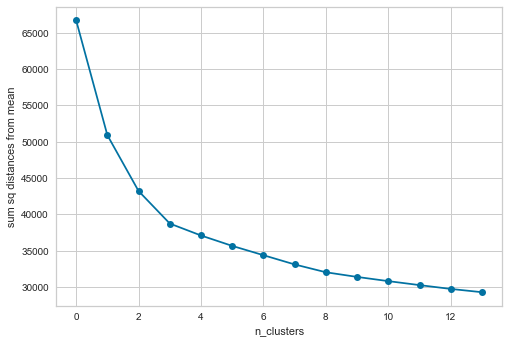

In [225]:
# Quick plot:

plt.clf()
plt.plot(cluster_errors, "o-")
plt.xlabel("n_clusters")
plt.ylabel("sum sq distances from mean")
plt.show()

In [226]:
n_clusters = 3
kmeans_pipeline = Pipeline(
    [
        ("cluster", KMeans(n_clusters=n_clusters, random_state=r_seed, verbose=0)),
    ]
)
kmeans_pipeline.fit(X_clustering)
labels = kmeans_pipeline.predict(X_clustering)
centers = kmeans_pipeline.named_steps["cluster"].cluster_centers_

In [228]:
# Add the cluster to the dataframe
X_clustering["Cluster Labels"] = labels
X_clustering["Segment"] = X_clustering["Cluster Labels"].map(
    {0: "First", 1: "Second", 2: "Third"}
)
# Order the cluster
X_clustering["Segment"] = X_clustering["Segment"].astype("category")
X_clustering["Segment"] = X_clustering["Segment"].cat.reorder_categories(
    ["First", "Second", "Third"]
)

In [229]:
df_model_clusters = df_model.copy()

In [231]:
df_model_clusters["Segment"] = X_clustering["Segment"]

In [238]:
df_churn_clusters = (
    df_model_clusters.groupby(["Segment", "Churn"])
    .agg({"gender": "count", "tenure": "median", "MonthlyCharges": "median"})
    .rename(
        columns={
            "gender": "Total",
            "tenure": "Avg. Tenure",
            "MonthlyCharges": "Avg. Monthly Charges",
        }
    )
    .reset_index()
    .sort_values("Total", ascending=False)
)
df_churn_clusters.sort_values(by="Segment")

,Segment,Churn,Total,Avg. Tenure,Avg. Monthly Charges
0,First,0,800,40,61.075
1,First,1,292,12,80.200
2,Second,0,1336,37,68.450
3,Second,1,449,9,77.850
4,Third,0,1585,36,61.800
5,Third,1,597,10,80.000


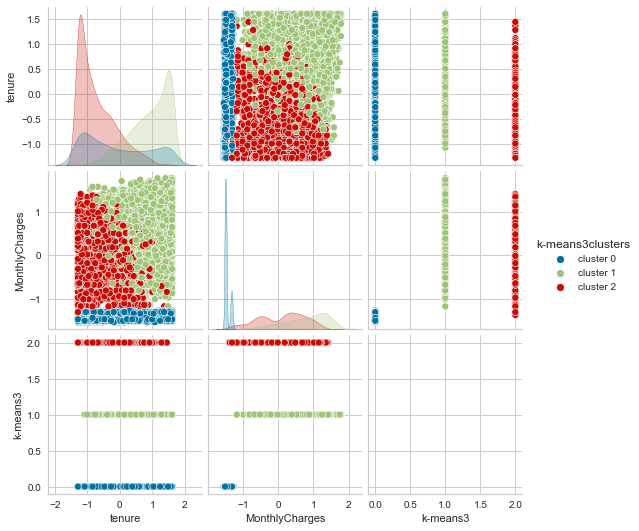

In [241]:
cols = ["tenure", "MonthlyCharges"]
# kmeans_pipeline.fit(data[cols])
data_kmeans = X_clustering[cols].copy()
data_kmeans["k-means3"] = labels
data_kmeans["k-means3clusters"] = data_kmeans["k-means3"].map(
    lambda i: "cluster " + str(i)
)

cols = ["tenure", "MonthlyCharges", "k-means3"]
g1 = sns.pairplot(data_kmeans, hue="k-means3clusters")
g1.fig.figsize = (18, 18)